# Assignment 2

Team Members:
- Abhinav Tyagi (2020A7PS2043H)
- Rishiraj Datta (2020A7PS2075H)
- Ritvik (2020A7PS1723H)

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Problem Statement
The given dataset is used to predict application energy usage (in Wh) (in the Application
column of the dataset) using various attributes such as temperatures, relative humidity various
rooms in the house, windspeed, visibility, etc (in the columns: T1,RH_1,T2,RH_2,,,
Visibility,rv1,rv2 of the dataset).

Dataset: https://drive.google.com/file/d/1hkc5d67JY1eHQ6EsidRMe3rPS3v3LeGs/view?usp=share_link

You are required to build a regression model to predict the application energy usage. You can
perform data preprocessing like standardization or min-max scaling, and do a 80:20/90:10
train-test split.

In [500]:
df = pd.read_csv("FODS-A2.csv")
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,39.248108,30


In [501]:
training_df = df.sample(frac=0.8, random_state=25)
testing_df = df[~df.index.isin(training_df.index)]


In [502]:
training_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
6,19.500000,37.59,17.290000,39.723333,20.290000,35.826667,18.666667,35.500000,17.600000,45.090000,...,37.000000,1.430,757.200000,97.666667,2.666667,53.0,1.10,40.941193,40.941193,20
1498,23.200000,46.50,22.730000,43.663333,22.600000,44.982222,20.790000,48.596667,21.757778,87.701667,...,46.933333,8.100,764.400000,89.000000,2.000000,40.0,6.40,0.269998,0.269998,100
4052,23.790000,39.20,22.790000,39.230000,21.200000,43.290000,18.600000,43.730000,18.666667,55.560000,...,46.500000,0.133,749.216667,99.000000,9.833333,37.0,0.00,34.596384,34.596384,50
1118,23.000000,34.59,20.533333,35.966667,23.390000,36.700000,22.760000,32.900000,20.890000,41.700000,...,38.163333,7.800,763.950000,66.333333,2.166667,40.0,1.78,19.733921,19.733921,60
7311,22.323333,39.50,20.200000,40.963333,22.533333,38.290000,21.290000,38.466667,20.066667,48.000000,...,37.000000,9.730,750.666667,70.000000,4.333333,40.0,4.43,24.447346,24.447346,100


In [503]:
testing_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
10,21.20,38.433333,18.500000,42.693333,22.600000,37.860000,19.890000,39.045000,19.790000,47.500000,...,43.163333,8.45,740.400000,73.000000,13.000000,40.000000,3.800,4.042957,4.042957,70
11,20.60,43.900000,18.856667,45.090000,21.390000,41.826667,20.100000,41.900000,18.790000,50.941429,...,46.095714,4.07,754.866667,95.666667,1.666667,63.666667,3.430,7.623146,7.623146,60
14,19.00,34.860000,16.890000,36.333333,19.533333,35.626667,18.200000,33.790000,17.290000,56.645000,...,39.966667,-0.20,761.900000,92.000000,4.000000,22.000000,-1.400,32.356099,32.356099,30
20,21.79,40.090000,19.533333,42.760000,22.856667,37.663333,21.856667,38.133333,19.823333,48.433333,...,42.156000,6.60,761.500000,95.000000,2.000000,25.000000,5.800,14.216779,14.216779,60
32,22.29,45.693333,21.666667,42.723333,21.851111,44.381111,22.222500,41.747500,19.100000,55.290000,...,46.126667,6.13,760.066667,66.000000,8.000000,40.000000,0.133,27.011352,27.011352,70


In [504]:
training_data = np.array(training_df.values, 'float')
testing_data = np.array(testing_df.values, 'float')

In [505]:
num_rows_training, num_cols_training = training_data.shape
num_rows_testing, num_cols_testing = testing_data.shape

In [506]:
print(num_rows_testing)
print(num_cols_testing)
print(num_rows_training)
print(num_cols_training)

1579
27
6315
27


In [507]:
feature_sets_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

In [508]:
min_max = np.zeros([num_cols_training, 2], dtype=float)

def get_min_max():
    for i in range(0, num_cols_training):
        min_max[i][0] = min(training_data[:,i])
        min_max[i][1] = max(training_data[:,i])

In [509]:
def normalize_datapoints(x, n, ind):
    x_normalized = np.zeros(n, dtype=float)

    for i in range(n) :
        x_normalized[i] = (x[i] - min_max[ind][0])/(min_max[ind][1] - min_max[ind][0])

    return x_normalized

def denormalize_datapoints(x, n, ind):
    x_denormalized = np.zeros(n, dtype=float)

    for i in range(n) :
        x_denormalized[i] = (x[i])*(min_max[ind][1] - min_max[ind][0]) + min_max[ind][0]
    
    return x_denormalized

In [510]:
get_min_max()

In [511]:
for i in range(num_cols_training-1):
    training_data[:,i] = normalize_datapoints(training_data[:,i], num_rows_training, i)
    testing_data[:,i] = normalize_datapoints(testing_data[:,i], num_rows_testing, i)

In [512]:
training_data_x = training_data[:,:-1]
training_data_t = training_data[:,-1]

testing_data_x = testing_data[:,:-1]
testing_data_t = testing_data[:,-1]

In [513]:
def train_model(data, target) :
    num_rows, num_cols = data.shape

    w = np.zeros([num_cols], dtype=float)

    det = np.linalg.det(np.dot(data.T, data))

    try:
        w = np.dot(np.dot(np.linalg.inv(np.dot(data.T, data)), data.T), target)
    except:
        learning_rate = 0.01

        for iteration in range(5000):
            y_pred = np.dot(data, np.transpose(w))
            der = np.dot(np.transpose(data), y_pred - target)
            w = np.transpose(w) - (learning_rate/num_rows)*(der)

    return w

In [514]:
def calculate_error(data, target, w, n):
    error = np.zeros(n, dtype=float)

    for i in range(n):
        differnce = target - np.dot(data, np.transpose(w[i]))
        error[i] = np.sqrt(np.dot(np.transpose(differnce), differnce)/(target.size))

    return error

### 2-A Correlation coefficients and Principal Component Analysis

i. Select a set of 1,2,3,...26 features by checking which of these features show a
maximum linear relationship with the target attribute by using Pearson correlation
coefficient. Use these features to build the regression model and find the training
and testing error for each set of features.

In [515]:
corr_value = np.corrcoef(training_data.T)

print(corr_value[-1])

[ 0.04377197  0.07502414  0.10646832 -0.0705268   0.07462763  0.02367503
  0.032549    0.0115826   0.00789959  0.00510066  0.11930539 -0.08577211
  0.01683884 -0.06327235  0.02569647 -0.09206786  0.00173958 -0.05505281
  0.10062516 -0.03654494 -0.16033334  0.08725735 -0.01496686  0.01008741
 -0.00190441 -0.00190441  1.        ]


In [516]:
corr_value = corr_value[-1][0:-1]

print(corr_value)

[ 0.04377197  0.07502414  0.10646832 -0.0705268   0.07462763  0.02367503
  0.032549    0.0115826   0.00789959  0.00510066  0.11930539 -0.08577211
  0.01683884 -0.06327235  0.02569647 -0.09206786  0.00173958 -0.05505281
  0.10062516 -0.03654494 -0.16033334  0.08725735 -0.01496686  0.01008741
 -0.00190441 -0.00190441]


In [517]:
corr_value = np.absolute(corr_value)

index = np.flip(np.argsort(corr_value))

column_headers = df.columns.values.tolist()

for i in range(num_cols_training-1):
    print(f"{column_headers[index[i]]}: {corr_value[index[i]]}")

RH_out: 0.1603333387234299
T6: 0.11930539008047673
T2: 0.10646831604893144
T_out: 0.10062515834755807
RH_8: 0.09206785956452258
Windspeed: 0.08725734570030218
RH_6: 0.08577211037256047
RH_1: 0.07502414297531407
T3: 0.07462762777047857
RH_2: 0.07052679526722619
RH_7: 0.06327234633190461
RH_9: 0.05505280796840861
T1: 0.04377197355001583
Press_mm_hg: 0.03654494149344637
T4: 0.03254899926733223
T8: 0.025696466335812754
RH_3: 0.023675031328264855
T7: 0.016838838400584033
Visibility: 0.014966859739902435
RH_4: 0.011582602101178528
Tdewpoint: 0.010087406069626737
T5: 0.007899586459726595
RH_5: 0.005100660540351886
rv1: 0.0019044139770705909
rv2: 0.0019044139770705909
T9: 0.0017395770003927047


In [518]:
training_data_corr = np.zeros([num_rows_training, num_cols_training], dtype=float)

training_data_corr[:,0] = np.ones(num_rows_training, dtype=float)

for i in range(1, num_cols_training):
    training_data_corr[:,i] = training_data_x[:,index[i-1]]

print(training_data_corr)

[[1.         0.96888889 0.24717018 ... 0.81886141 0.81886141 0.26014568]
 [1.         0.85333333 0.41891101 ... 0.00529446 0.00529446 0.36420395]
 [1.         0.98666667 0.19545277 ... 0.69194291 0.69194291 0.23343739]
 ...
 [1.         0.17777778 0.92113583 ... 0.53907495 0.53907495 0.77003122]
 [1.         0.67555556 0.63065964 ... 0.18827064 0.18827064 0.94797086]
 [1.         0.96666667 0.40622561 ... 0.69155994 0.69155994 0.01838363]]


In [519]:
w_models_corr = np.zeros([num_cols_training-1, num_cols_training], dtype = float)

for i in range(num_cols_training-1):
    w_models_corr[i][:i+2] = train_model(training_data_corr[:,:i+2], training_data_t)

for i in range(num_cols_training-1):
    print(i+1)
    print(w_models_corr[i][:i+2])

1
[159.87279747 -83.79232765]
2
[141.32237571 -71.59872633  23.69221638]
3
[140.84358668 -71.20185881  17.8808469    8.18192151]
4
[ 149.14390305  -75.80720732  224.05765031   15.0200605  -227.54138174]
5
[ 146.07855834  -69.08727992  218.10597027   15.94304203 -216.57638143
   -8.95382075]
6
[ 121.23295681  -46.33330469  216.33278014   33.33820114 -219.46018303
  -31.6236243    52.23401223]
7
[  96.76402259  -61.57352268  264.97777753   41.49127729 -204.75418405
  -78.13402061   36.59696598   61.21322577]
8
[ 111.94471307  -97.04745057  220.64183891   25.87575605 -251.26111623
 -158.80204163   29.31336504   36.85752625  242.65161842]
9
[ 104.84284721 -141.87312544  292.54515283  -24.79095372 -337.83856107
 -157.42736802   31.79117971   77.30934837  225.32234463  106.81148357]
10
[ 191.49942409  -48.64577634  194.56923109 -261.95743293 -175.69939876
 -150.63910179   30.708003     64.15923299  568.51788698  225.48605355
 -504.96118851]
11
[ 169.50375913  -41.70345997  197.38480487 -241.

In [520]:
testing_data_corr = np.zeros([num_rows_testing, num_cols_testing], dtype=float)

testing_data_corr[:,0] = np.ones(num_rows_testing, dtype=float)

for i in range(1, num_cols_testing):
    testing_data_corr[:,i] = testing_data_x[:,index[i-1]]

print(testing_data_corr)

[[1.         0.64       0.43442623 ... 0.08076692 0.08076692 0.56191467]
 [1.         0.94222222 0.29664325 ... 0.15238328 0.15238328 0.38605619]
 [1.         0.89333333 0.16129977 ... 0.64712933 0.64712933 0.32362123]
 ...
 [1.         0.76       0.2558548  ... 0.11711171 0.11711171 0.24973985]
 [1.         0.91111111 0.24619438 ... 0.23634269 0.23634269 0.31217482]
 [1.         0.93333333 0.3808548  ... 0.27567508 0.27567508 0.5421436 ]]


In [521]:
training_error_corr = calculate_error(training_data_corr, training_data_t, w_models_corr, num_cols_training-1)
testing_error_corr = calculate_error(testing_data_corr, testing_data_t, w_models_corr, num_cols_training-1)

print(training_error_corr)
print(testing_error_corr)

min_idx = np.argmin(testing_error_corr)
min_testing_error_corr = testing_error_corr[min_idx]

print(min_idx)
print(testing_error_corr[min_idx])

[103.57352538 103.51470694 103.51171467 103.14741375 103.14125475
 102.80757785 102.38986717 100.6391807  100.27866667  98.66097281
  98.54745622  98.50114242  98.40721876  98.40706434  98.3562316
  98.35094444  98.06406002  97.85114571  97.84949023  97.7623578
  97.7496996   97.68052973  97.58979019  97.58640133 101.41146545
 101.2856562 ]
[100.79679802 100.76886637 100.72420645 100.70567044 100.68367092
 100.18978154  99.73290607  98.01804618  97.27123788  95.5684397
  95.67256049  95.64057926  95.75505644  95.74304862  95.64973017
  95.58365945  95.40033988  94.92745497  94.89653379  94.89344791
  94.90050476  94.86072077  94.75115149  94.74687677  98.24889076
  98.12494996]
23
94.74687677487255


In [522]:
corr_errors = np.append(training_error_corr.reshape([26,1]), testing_error_corr.reshape([26,1]), axis=1)
idx_values = np.arange(1, 27, 1, dtype=int)
col_names = ['Training Error', 'Testing Error']

fwd_df = pd.DataFrame(data=corr_errors, index=idx_values, columns=col_names)

print(fwd_df)

    Training Error  Testing Error
1       103.573525     100.796798
2       103.514707     100.768866
3       103.511715     100.724206
4       103.147414     100.705670
5       103.141255     100.683671
6       102.807578     100.189782
7       102.389867      99.732906
8       100.639181      98.018046
9       100.278667      97.271238
10       98.660973      95.568440
11       98.547456      95.672560
12       98.501142      95.640579
13       98.407219      95.755056
14       98.407064      95.743049
15       98.356232      95.649730
16       98.350944      95.583659
17       98.064060      95.400340
18       97.851146      94.927455
19       97.849490      94.896534
20       97.762358      94.893448
21       97.749700      94.900505
22       97.680530      94.860721
23       97.589790      94.751151
24       97.586401      94.746877
25      101.411465      98.248891
26      101.285656      98.124950


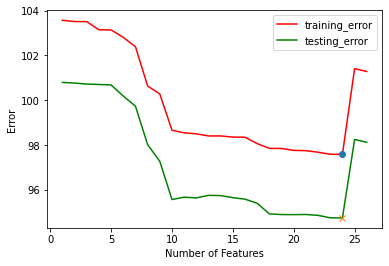

In [523]:
# Correlation Coefficient Analysis

# Plotting both the error simultaneously
plt.plot(feature_sets_num, training_error_corr, color='r', label='training_error')
plt.plot(feature_sets_num, testing_error_corr, color='g', label='testing_error')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Features")
plt.ylabel("Error")

# Minimum index
training_ind = np.argmin(training_error_corr)
testing_ind = np.argmin(testing_error_corr)

plt.plot(training_ind+1, training_error_corr[training_ind], marker='o')
plt.plot(testing_ind+1, testing_error_corr[testing_ind], marker='x')
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
print("Features Selected: ")

for i in range(num_cols_training-1):
    print(f"{column_headers[features[i]]}")

ii. Perform Principal component analysis to select a set of 1,2,3,...26 principal
components. Use these features to build the regression model and find the training
and testing error for each set of features. Also find the percentage of variance
captured by each of the feature sets.

In [524]:
covariance_matrix = np.cov(training_data_x.T)
print(covariance_matrix.shape)

(26, 26)


In [525]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

index = np.flip(np.argsort(eigen_values))
eigen_values = eigen_values[index]
eigen_vectors = eigen_vectors[:,index]

In [526]:
print(eigen_values)

[ 3.61372014e-01  2.20014678e-01  1.64906732e-01  6.18716102e-02
  3.33521294e-02  3.00750647e-02  2.12649786e-02  1.69138624e-02
  1.45175174e-02  1.12091249e-02  8.29124940e-03  6.82052744e-03
  5.64568103e-03  4.50776625e-03  4.19784793e-03  3.88053659e-03
  3.08920314e-03  2.47701420e-03  1.76509792e-03  1.47305221e-03
  1.35793899e-03  1.02229377e-03  7.49146920e-04  3.22931590e-04
  1.26573098e-04 -6.70943045e-36]


In [527]:
sum_eigen_values = np.sum(eigen_values)

In [528]:
variances = np.zeros(num_cols_training-1, dtype=float)

for i in range(num_cols_training-1):
    variances[i] = np.sum(eigen_values[0:i+1])/sum_eigen_values

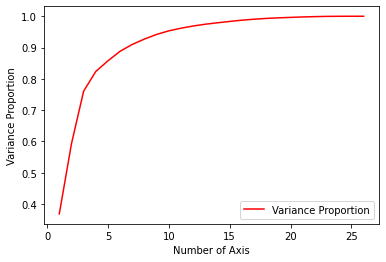

In [529]:
# Proportion of Variances
plt.plot(feature_sets_num, variances, color='r', label='Variance Proportion')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Axis")
plt.ylabel("Variance Proportion")
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()

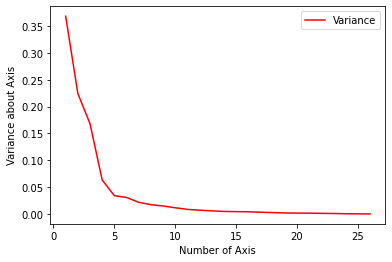

In [530]:
# Proportion of Variances
plt.plot(feature_sets_num, eigen_values/sum_eigen_values, color='r', label='Variance')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Axis")
plt.ylabel("Variance about Axis")
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()

In [531]:
w_models_pca = np.zeros([num_cols_training-1, num_cols_training], dtype = float)

training_data_pca = np.dot(training_data_x, eigen_vectors.T)
training_data_pca = np.c_[np.ones(num_rows_training), training_data_pca]

print(training_data_pca.shape)

(6315, 27)


In [532]:
for i in range(num_cols_training-1):
    w_models_pca[i][:i+2] = train_model(training_data_pca[:,:i+2], training_data_t)

for i in range(num_cols_training-1):
    print(i+1)
    print(w_models_pca[i][:i+2])

1
[ 172.18770331 -125.57091993]
2
[ 166.769206   -119.54844734   -4.68663154]
3
[ 167.13694238 -119.36617665   -4.1083637    -2.60407478]
4
[ 172.68174985 -104.5847139   -11.90302729   32.07316973  -54.72376307]
5
[ 166.0657198  -102.81643455   -9.65690139   30.58997251  -65.04474563
  -13.61082397]
6
[ 184.47591268 -115.73202149  -15.93016959   30.80132035  -63.86272073
  -23.32909616  -46.3731746 ]
7
[ 193.42039373 -115.18856185  -21.98452867   21.02597204  -62.84470936
  -17.06956996  -55.4569859    14.00264548]
8
[ 156.90798668  -73.12582424    5.11040206   -9.13871215 -114.14416269
  -17.79284297  -12.33257556    0.86615815  -64.65359322]
9
[ 121.25356425  -44.75111381    7.96969026  -29.02793997 -138.64643409
  -96.13812104   34.54434224  -42.1733778   -86.33071685  162.39951624]
10
[ 107.58931301  -41.3181301    -1.83825571  -50.77773492 -145.05819522
 -117.20940409   34.35262919  -88.12552763 -110.77912171  113.82080735
  -77.02620939]
11
[ 115.20058894  -45.3516869    -1.55902

In [533]:
testing_data_pca = np.dot(testing_data_x, eigen_vectors.T)
testing_data_pca = np.c_[np.ones(num_rows_testing), testing_data_pca]

print(testing_data_pca.shape)

(1579, 27)


In [534]:
training_error_pca = calculate_error(training_data_pca, training_data_t, w_models_pca, num_cols_training-1)
testing_error_pca = calculate_error(testing_data_pca, testing_data_t, w_models_pca, num_cols_training-1)

print(training_error_pca)
print(testing_error_pca)

min_idx = np.argmin(testing_error_pca)
min_testing_error_pca = testing_error_pca[min_idx]

print(min_idx)
print(testing_error_pca[min_idx])

[103.37579319 103.36877354 103.36841314 103.06053402 103.05190503
 102.98765788 102.96750547 102.87851894 102.48025002 102.22149259
 102.21747929 101.66581772 101.626647   101.14655802 100.85054714
 100.50456378 100.48489265 100.44610703 100.19480279 100.19009336
 100.12711974 100.12711432  98.53536654  97.77549365  97.27617928
 136.18700582]
[100.84986821 100.82663486 100.81976289 100.64515066 100.58270441
 100.65176906 100.69031018 100.65248015 100.19910749  99.99260549
 100.04222227  99.53396045  99.48270242  99.20456677  98.66279987
  98.45760164  98.39078627  98.16278229  97.8284453   97.81151735
  97.6820172   97.6834768   95.07838943  94.4570462   94.35109201
 136.50192288]
24
94.3510920118284


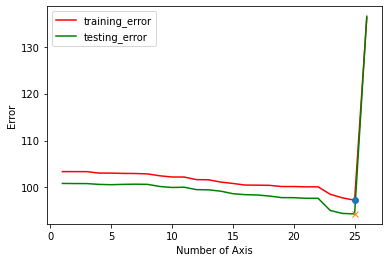

In [535]:
# Principal Component Analysis 

# Plotting both the error simultaneously
plt.plot(feature_sets_num, training_error_pca, color='r', label='training_error')
plt.plot(feature_sets_num, testing_error_pca, color='g', label='testing_error')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Axis")
plt.ylabel("Error")

# Minimum index
training_ind = np.argmin(training_error_pca)
testing_ind = np.argmin(testing_error_pca)

plt.plot(training_ind+1, training_error_pca[training_ind], marker='o')
plt.plot(testing_ind+1, testing_error_pca[testing_ind], marker='x')
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()

In [536]:
pca_errors = np.append(training_error_pca.reshape([26,1]), testing_error_pca.reshape([26,1]), axis=1)
idx_values = np.arange(1, 27, 1, dtype=int)
col_names = ['Training Error', 'Testing Error']

fwd_df = pd.DataFrame(data=pca_errors, index=idx_values, columns=col_names)

print(fwd_df)

    Training Error  Testing Error
1       103.375793     100.849868
2       103.368774     100.826635
3       103.368413     100.819763
4       103.060534     100.645151
5       103.051905     100.582704
6       102.987658     100.651769
7       102.967505     100.690310
8       102.878519     100.652480
9       102.480250     100.199107
10      102.221493      99.992605
11      102.217479     100.042222
12      101.665818      99.533960
13      101.626647      99.482702
14      101.146558      99.204567
15      100.850547      98.662800
16      100.504564      98.457602
17      100.484893      98.390786
18      100.446107      98.162782
19      100.194803      97.828445
20      100.190093      97.811517
21      100.127120      97.682017
22      100.127114      97.683477
23       98.535367      95.078389
24       97.775494      94.457046
25       97.276179      94.351092
26      136.187006     136.501923


### 2-B Greedy Forward and Backward Feature Selection

Perform (i) greedy forward feature selection and (ii) greedy backward feature selection to find the subset of features that make the optimal regression model.

Find the minimum training and testing error of the optimal model (using 1,2,3,...26 features).

#### (i) greedy forward feature selection

In [537]:
def error_function(data, target, w):
    
    differnce = target - np.dot(data, np.transpose(w))
    error = np.sqrt(np.dot(np.transpose(differnce), differnce)/(target.size))

    return error

In [538]:
training_forward_df = training_df.sample(frac=0.75, random_state=25)
validation_forward_df = training_df[~training_df.index.isin(training_forward_df.index)]

In [539]:
training_forward_data = np.array(training_forward_df.values, 'float')
validation_forward_data = np.array(validation_forward_df.values, 'float')

num_rows_training_forward, num_cols_training_forward = training_forward_data.shape
num_rows_validation_forward, num_cols_validation_forward = validation_forward_data.shape

In [540]:
for i in range(num_cols_training-1):
    training_forward_data[:,i] = normalize_datapoints(training_forward_data[:,i], num_rows_training_forward, i)
    validation_forward_data[:,i] = normalize_datapoints(validation_forward_data[:,i], num_rows_validation_forward, i)

In [541]:
training_forward_x = training_forward_data[:,:-1]
training_forward_t = training_forward_data[:,-1]

validation_forward_x = validation_forward_data[:,:-1]
validation_forward_t = validation_forward_data[:,-1]

In [542]:
w_models_forward = np.zeros([1, num_cols_training], dtype=float)

check_array = np.zeros(num_cols_training-1, dtype=float)
validation_forward_error_array = np.zeros(num_cols_training-1, dtype=float)
testing_forward_error_array = np.zeros(num_cols_testing-1, dtype=float)

training_data_x_forward = np.ones([num_rows_training_forward, 1], dtype=float)
validation_data_x_forward = np.ones([num_rows_validation_forward, 1], dtype=float)

validation_forward_error = math.inf

features = np.zeros(27, dtype=int)

feature_pred = -1

for loop in range(num_cols_training-1):

    error = math.inf
    feature_pred = -1

    for i in range(num_cols_training-1):
        
        if check_array[i] == 1:
            continue
        
        training_data_x_forward_temp = training_data_x_forward
        validation_data_x_forward_temp = validation_data_x_forward

        training_data_x_forward_temp = np.append(training_data_x_forward_temp, training_forward_x[:,i:i+1], axis=1)
        validation_data_x_forward_temp = np.append(validation_data_x_forward_temp, validation_forward_x[:,i:i+1], axis=1)
        
        w_models_forward_temp = train_model(training_data_x_forward_temp, training_forward_t).reshape([1,loop+2])
        
        validation_error = calculate_error(validation_data_x_forward_temp, validation_forward_t, w_models_forward_temp, 1)
        
        if validation_error < validation_forward_error:
            validation_forward_error = validation_error
            validation_forward_error_array[loop] = validation_forward_error
            w_models_forward[0][:loop+2] = w_models_forward_temp
            feature_pred = i

    if feature_pred == -1:
        validation_forward_error_array[loop] = validation_error
        features[loop] = feature_pred
        break
    
    check_array[feature_pred] = 1
    features[loop] = feature_pred

    testing_x_temp = np.ones([num_rows_testing,1], dtype=float)

    for f in range(loop+1):
        feat = int(features[f])
        testing_x_temp = np.append(testing_x_temp, testing_data_x[:,feat:feat+1], axis=1)

    w_models_temp = np.zeros([1, loop+2], dtype=float)
    
    for w in range(loop+2):
        val = w_models_forward[0][w]
        w_models_temp[0][w] = val


    testing_forward_error_array[loop] = calculate_error(testing_x_temp, testing_data_t, w_models_temp, 1)
    training_data_x_forward = np.append(training_data_x_forward, training_forward_x[:,feature_pred:feature_pred+1], axis=1)
    validation_data_x_forward = np.append(validation_data_x_forward, validation_forward_x[:,feature_pred:feature_pred+1], axis=1)


In [543]:
print("Features Selected: ")

for i in range(num_cols_training-1):
    if features[i] == -1:
        break
    print(f"{column_headers[features[i]]}")

Features Selected: 
RH_out
RH_1
RH_8
RH_2
Windspeed
T7
T3
T2
T1
RH_4
T6
T_out
RH_3
T8
RH_6
T4
T9
RH_9
T5
rv1


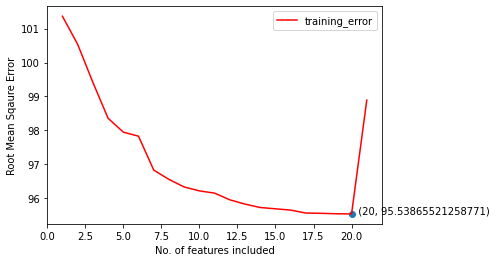

In [544]:
plt.xlabel('No. of features included')
plt.ylabel('Root Mean Sqaure Error')

num_features = 21

min_idx = np.argmin(validation_forward_error_array[:num_features])

i_x = (feature_sets_num[min_idx])
i_y = (validation_forward_error_array[min_idx])
plt.scatter(i_x,i_y)
plt.text(i_x, i_y, '  ({}, {})'.format(i_x, i_y))

plt.plot(feature_sets_num[:num_features], validation_forward_error_array[:num_features], color='r', label='training_error')
# plt.plot(feature_sets_num[:num_features], testing_forward_error_array[:num_features], color='b', label='testing_error')

plt.legend()

plt.show()

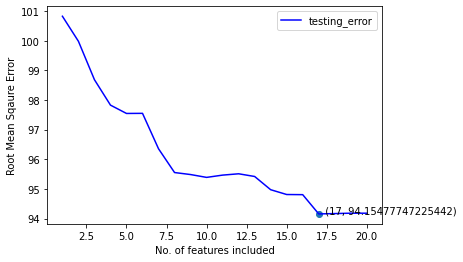

In [545]:
plt.xlabel('No. of features included')
plt.ylabel('Root Mean Sqaure Error')

num_features = 20

min_idx = np.argmin(testing_forward_error_array[:num_features])
min_error_fwd = testing_forward_error_array[min_idx]

i_x = (feature_sets_num[min_idx])
i_y = (testing_forward_error_array[min_idx])
plt.scatter(i_x,i_y)
plt.text(i_x, i_y, '  ({}, {})'.format(i_x, i_y))

# plt.plot(feature_sets_num[:num_features], validation_forward_error_array[:num_features], color='r', label='training_error')
plt.plot(feature_sets_num[:num_features], testing_forward_error_array[:num_features], color='b', label='testing_error')

plt.legend()

plt.show()

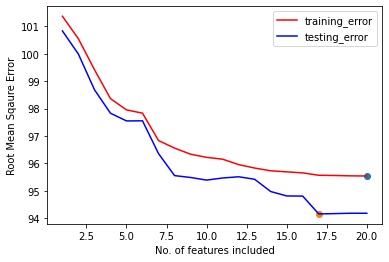

In [546]:
plt.xlabel('No. of features included')
plt.ylabel('Root Mean Sqaure Error')

num_features = 20

min_idx = np.argmin(validation_forward_error_array[:num_features])
i_x = (feature_sets_num[min_idx])
i_y = (validation_forward_error_array[min_idx])
plt.scatter(i_x,i_y)

min_idx = np.argmin(testing_forward_error_array[:num_features])
i_x = (feature_sets_num[min_idx])
i_y = (testing_forward_error_array[min_idx])
plt.scatter(i_x,i_y)

plt.plot(feature_sets_num[:num_features], validation_forward_error_array[:num_features], color='r', label='training_error')
plt.plot(feature_sets_num[:num_features], testing_forward_error_array[:num_features], color='b', label='testing_error')

plt.legend()

plt.show()

In [547]:
fwd_errors = np.append(validation_forward_error_array.reshape([26,1]), testing_forward_error_array.reshape([26,1]), axis=1)
idx_values = np.arange(1, 22, 1, dtype=int)
col_names = ['Training Error', 'Testing Error']

fwd_df = pd.DataFrame(data=fwd_errors[:21,:], index=idx_values, columns=col_names)

print(fwd_df)

    Training Error  Testing Error
1       101.365302     100.829199
2       100.540350      99.982648
3        99.417249      98.685852
4        98.358938      97.828126
5        97.949752      97.546865
6        97.829592      97.550532
7        96.830701      96.354096
8        96.555934      95.551726
9        96.332769      95.484140
10       96.218242      95.388117
11       96.150856      95.464914
12       95.954213      95.509738
13       95.827826      95.418654
14       95.727259      94.972024
15       95.689237      94.809872
16       95.650942      94.804854
17       95.564946      94.154777
18       95.556018      94.166222
19       95.543176      94.179559
20       95.538655      94.178460
21       98.891754       0.000000


#### (ii) greedy backward feature selection

In [548]:
training_backward_data = training_forward_data
validation_backward_data = validation_forward_data

num_rows_training_backward, num_cols_training_backward = training_backward_data.shape
num_rows_validation_backward, num_cols_validation_backward = validation_backward_data.shape

In [549]:
training_backward_x = training_backward_data[:,:-1]
training_backward_t = training_backward_data[:,-1]

validation_backward_x = validation_backward_data[:,:-1]
validation_backward_t = validation_backward_data[:,-1]

In [550]:
# w_models_backward = np.zeros([1, num_cols_training], dtype=float)
w_models_backward = 0

check_array = np.zeros(num_cols_training-1, dtype=float)
validation_backward_error_array = np.zeros(num_cols_training-1, dtype=float)
testing_backward_error_array = np.zeros(num_cols_testing-1, dtype=float)

training_data_x_backward = np.ones([num_rows_training_backward, 1], dtype=float)
training_data_x_backward = np.append(training_data_x_backward, training_backward_x, axis=1)

validation_data_x_backward = np.ones([num_rows_validation_backward, 1], dtype=float)
validation_data_x_backward = np.append(validation_data_x_backward, validation_backward_x, axis=1)

w_models_backward = train_model(training_data_x_backward, training_backward_t).reshape([1,27])
validation_backward_error_initial = calculate_error(validation_data_x_backward, validation_backward_t, w_models_backward, 1)
validation_backward_error = validation_backward_error_initial

testing_data_x_backward = np.ones([num_rows_testing, 1], dtype=float)
testing_data_x_backward = np.append(testing_data_x_backward, testing_data_x, axis=1)

testing_backward_error_initial = calculate_error(testing_data_x_backward, testing_data_t, w_models_backward, 1)

# print(validation_backward_error)

feature_pred = -1

features = np.zeros(27, dtype=int)

num_cols_backward = num_cols_training

for loop in range(num_cols_training-1):

    error = math.inf
    feature_pred = -1

    for i in range(num_cols_backward-1):

        if check_array[i] == 1:
            continue

        training_data_x_backward_temp = training_data_x_backward
        validation_data_x_backward_temp = validation_data_x_backward

        training_data_x_backward_temp = np.delete(training_data_x_backward_temp, i+1, axis=1)
        validation_data_x_backward_temp = np.delete(validation_data_x_backward_temp, i+1, axis=1)

        w_models_backward_temp = train_model(training_data_x_backward_temp, training_backward_t).reshape([1,26-loop])

        validation_error_local = calculate_error(validation_data_x_backward_temp, validation_backward_t, w_models_backward_temp, 1)

        if validation_error_local < validation_backward_error:
            validation_backward_error = validation_error_local
            validation_backward_error_array[loop+1] = validation_backward_error
            # w_models_backward[0][:26-loop] = w_models_backward_temp
            w_models_backward = w_models_backward_temp
            feature_pred = i

    if feature_pred == -1:
        validation_backward_error_array[loop+1] = validation_error_local
        features[loop] = feature_pred
        break
    
    check_array[feature_pred] = 1

    features[loop] = feature_pred

    testing_x_temp = np.ones([num_rows_testing,1], dtype=float)
    # testing_x_temp = np.append(testing_x_temp, testing_data_x, axis=1)

    for f in range(26):
        if check_array[f] == 0:
            testing_x_temp = np.append(testing_x_temp, testing_data_x[:,f:f+1], axis=1)

    w_models_temp = np.zeros([1, 26-loop], dtype=float)
    
    for w in range(26-loop):
        val = w_models_backward[0][w]
        w_models_temp[0][w] = val

    # print(w_models_temp)

    testing_backward_error_array[loop+1] = calculate_error(testing_x_temp, testing_data_t, w_models_temp, 1)

    training_data_x_backward = np.delete(training_data_x_backward, feature_pred+1, axis=1)
    validation_data_x_backward = np.delete(validation_data_x_backward, feature_pred+1, axis=1)

    num_cols_backward = num_cols_backward - 1

In [551]:
print("Features Removed: ")

for i in range(num_cols_training-1):
    if features[i] == -1:
        break
    print(f"{column_headers[features[i]]}")

Features Removed: 
rv1
T7
RH_5
T_out
RH_out
Press_mm_hg


In [552]:
validation_backward_error_array[0] = validation_backward_error_initial
testing_backward_error_array[0] = testing_backward_error_initial

In [553]:
backward_error_array = np.zeros(26, dtype=float)

for i in range(26):
    val = validation_backward_error_array[25-i]
    backward_error_array[i] = val

backward_testing_error_array = np.zeros(26, dtype=float)

for i in range(26):
    val = testing_backward_error_array[25-i]
    backward_testing_error_array[i] = val
    

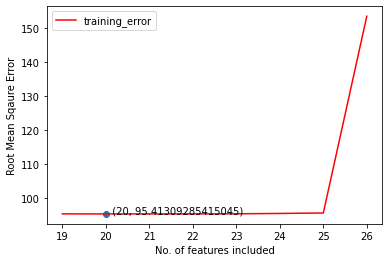

In [554]:
num_features = 18

plt.xlabel('No. of features included')
plt.ylabel('Root Mean Sqaure Error')

# min_idx = np.argmin(backward_error_array[num_features:])
min_idx = 19
i_x = (feature_sets_num[min_idx])
i_y = (backward_error_array[min_idx])
plt.scatter(i_x,i_y)
plt.text(i_x, i_y, '  ({}, {})'.format(i_x, i_y))

plt.plot(feature_sets_num[num_features:], backward_error_array[num_features:], color='r', label='training_error')
# plt.plot(feature_sets_num[num_features:], backward_testing_error_array[num_features:], color='b', label='testing_error')

plt.legend()

plt.show()

94.24480864557479


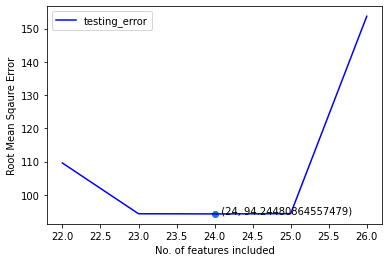

In [555]:
num_features = 21

plt.xlabel('No. of features included')
plt.ylabel('Root Mean Sqaure Error')

# min_idx = np.argmin(backward_error_array[num_features:])
min_idx = 23
min_error_bwd = backward_testing_error_array[23]
print(min_error_bwd)

i_x = (feature_sets_num[min_idx])
i_y = (backward_testing_error_array[min_idx])
plt.scatter(i_x,i_y)
plt.text(i_x, i_y, '  ({}, {})'.format(i_x, i_y))

# plt.plot(feature_sets_num[num_features:], backward_error_array[num_features:], color='r', label='training_error')
plt.plot(feature_sets_num[num_features:], backward_testing_error_array[num_features:], color='b', label='testing_error')

plt.legend()

plt.show()

In [556]:
bwd_errors = np.append(backward_error_array.reshape([26,1]), backward_testing_error_array.reshape([26,1]), axis=1)
idx_values = np.arange(1, 27, 1, dtype=int)
col_names = ['Training Error', 'Testing Error']

bwd_df = pd.DataFrame(data=bwd_errors, index=idx_values, columns=col_names)

print(bwd_df[19:])

    Training Error  Testing Error
20       95.413093     106.630224
21       95.415608     108.379569
22       95.421875     109.564684
23       95.449757      94.295111
24       95.547902      94.244809
25       95.684780      94.325599
26      153.350869     153.736541


### 2-C Comparative Analysis

Perform comparative analysis of the best models obtained using each of the feature selection 
techniques (from 2-A and 2-B) and the performance with the regression model using all the 
features.

In [557]:
w_models_regression = train_model(training_data_x, training_data_t).reshape([1,26])
error_regression = calculate_error(testing_data_x, testing_data_t, w_models_regression, 1)

In [558]:
models = ['PCC', 'PCA', 'Forward Selection', 'Backward Selection', 'Regression Model']
errors = [min_testing_error_corr, min_testing_error_pca, min_error_fwd, min_error_bwd, error_regression[0]]
col_names = ['Error']

errors_df = pd.DataFrame(data=errors, index=models, columns=col_names)

print(errors_df)

                        Error
PCC                 94.746877
PCA                 94.351092
Forward Selection   94.154777
Backward Selection  94.244809
Regression Model    98.048048


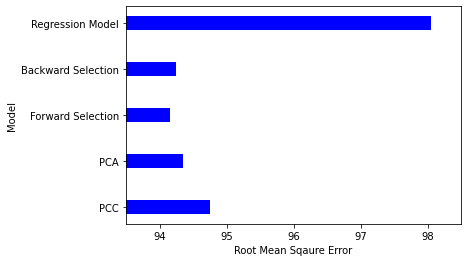

In [559]:
plt.xlabel('Root Mean Sqaure Error')
plt.ylabel('Model')

plt.barh(models, errors, color='b', height=0.3)

ax = plt.gca()
ax.set_xlim([93.5, 98.5])

plt.show()